# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Principal Component Analysis

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

#### Answer: 

- Principle component analysis combines feature components to reduce data dimensionality, reducing model complexity and overfitting. <br> The first principle component explains the greatest amount of variance in the data set.
- Combines features that are highly correlated with one another.


### 2: What are some reasons to use PCA?

#### Answer: 

- To reduce number of features (dataset size)
- To reduce overfitting


### 3: Why is scaling important for PCA?

#### Answer: 

- Scaling ensures that parameters are put together on an even scale. (Same unit-vector)


### 4: How can one determine how many principle components to use in a model?

#### Answer: 

- Business understanding. Determined by a needs of variance to be explained.
- Can be called directly as a percentage in the `n_components` argument


## PCA in Code

### Set Up

In [2]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- Scale the data


In [3]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [4]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA()

pca_data = pca.fit_transform(X_scaled)

pca_data

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

### 7: How Much Variance is Explained by the First 2 Components?

In [5]:
# Code here to answer the question
pca.explained_variance_ratio_[0:2].sum()

0.6324320765155941

#### Answer:

- The first two components explain 63.2% of variance.


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

#### Answer:

- k-means adjusts its cluster centers by measuring distances from the cluster center to maximize inter-cluster distances and minimize intra-cluster distances.


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Answer:

- Inertia is the distance from points to its cluster centroid. The model wants to minimize this value.
- Inertia plot = Elbow Plot


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

#### Answer:

- Silhouette plot of Silhouette scores by k
- Higher score is better


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [46]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- Scaling


In [7]:
# Code to preprocess the data
# Name the processed data X_processed
k_scaler = StandardScaler()
X_processed = k_scaler.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [9]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=2)

In [10]:
# Fit the object

hac.fit(X_processed)

AgglomerativeClustering()

In [12]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score

# Calculate Silhoutte Score
score = silhouette_score(X_processed, hac.labels_)

# Print the score

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.577


### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [23]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    
    # instantiate new clustering object
    hac = AgglomerativeClustering(n_clusters=n)
    
    # Fit the new clustering model
    hac.fit(data)
    
    # Calculate Silhoutte Score
    score = silhouette_score(data, hac.labels_)

    # Print the score
    print(f'Silhouetter Score for {n} clusters: {round(score, 3)}')
    
    # Return the labels attribute from the fit clustering model
    return hac.labels_
    
    pass

In [24]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

Silhouetter Score for 2 clusters: 0.577
Silhouetter Score for 3 clusters: 0.447
Silhouetter Score for 4 clusters: 0.401
Silhouetter Score for 5 clusters: 0.331
Silhouetter Score for 6 clusters: 0.315
Silhouetter Score for 7 clusters: 0.317
Silhouetter Score for 8 clusters: 0.311


# 3) Time Series

In [26]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- Dates need to be in date-time and set as the index.


In [27]:
# Code here 
df = ap.set_index(pd.to_datetime(ap['Month']))
df = df['#Passengers']
df

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

### 15: Explore Patterns in the Data

First: what kinds of patterns can one find in time series data?

- Trends
- Seasonality
- Cyclical
- Irregularity


Second, plot this time series data. What kinds of patterns do you see in this dataset?

<AxesSubplot:xlabel='Year', ylabel='# Passengers'>

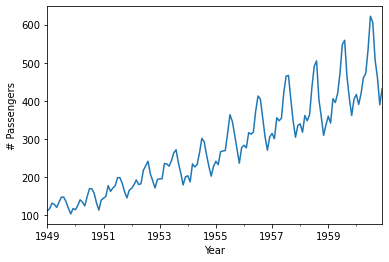

In [28]:
# Code to plot the time series
df.plot(ylabel="# Passengers", xlabel="Year")

### 16: Explore the Moving Average

What window would make sense to use for this data?

- Monthly or weekly


In [29]:
# Code to create the moving average
roll_avg_ts = df.rolling(window=12).mean()
roll_avg_ts


Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: #Passengers, Length: 144, dtype: float64

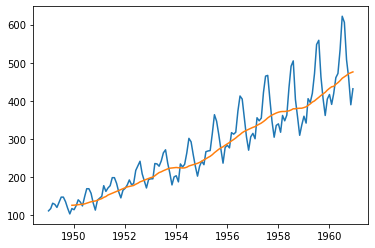

In [30]:
# Subtract the moving average to the above plot

plt.plot(df)
plt.plot(roll_avg_ts)

### 17: Explore Stationarity


Why do we try to make our data stationary?

- To remove the effect of time on our dataset so we can model the noise.


What can we do to make our data stationary?

- Subtract the rolling average from the data.


### 18: Check Stationarity

In [32]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller
is_stationary = adfuller(df)[1] < 0.05
is_stationary


False

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [33]:
# Code here to try to make the data stationary
diff_ap = df.diff().dropna()

# Data is already stationary by adfuller with alpha of 0.05 

In [34]:
# Code here to check if the data is stationary
is_stationary = adfuller(diff_ap)[1] < 0.05
is_stationary

False

In [37]:
def dicky_fuller_test(data, alpha):
    is_stationary = adfuller(data)[1] < alpha
    if is_stationary == True:
        print(f'The data is stationary with a fuller score of {round(adfuller(data)[1],3)}')
    else:
        print(f'The data is not stationary with a fuller score of {round(adfuller(data)[1],3)}')
    pass

In [38]:
dicky_fuller_test(diff_ap, 0.05)

The data is not stationary with a fuller score of 0.054


<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [ ]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

#### Answer:

1. tokenization
2. remove stopwords
3. stem

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

#### Answer:

- An array of counts by word. depending on the vectorizer, the counts can differ.


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

#### Answer:

- Term Frequency - Inverse Document Frequency. 
- In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.<br><br>In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.


## NLP in Code

### Set Up

In [39]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [40]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\r\n...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [41]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X = policies.policy
y = policies.candidate

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate vectorizer
vector = CountVectorizer()

# Fit vectorizer
vector.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [43]:
# Code here to transform train and test sets with the vectorizer
X_train_v = vector.transform(X_train)
X_test_v = vector.transform(X_test)

In [44]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rforest = RandomForestClassifier()
rforest.fit(X_train_v, y_train)

RandomForestClassifier()

In [45]:
# Code here to evaluate your model on the test set
rforest.score(X_test_v, y_test)

0.9375